In [11]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,precision_score,recall_score,accuracy_score
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier


In [12]:
data =pd.read_csv("data/data_1.csv")
X = data.drop("default.payment.next.month",axis=1)
y = data["default.payment.next.month"]

In [ ]:
model = XGBClassifier()
model.fit(X, y)
importances = pd.DataFrame(data={
    'Attribute': X.columns,
    'Importance': model.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)

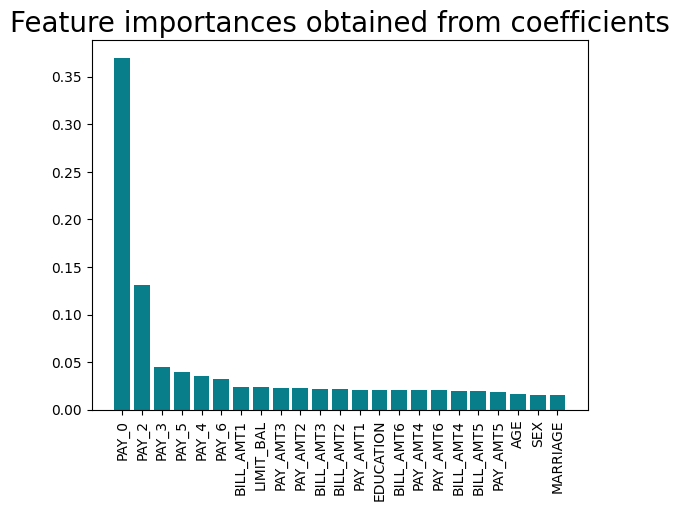

In [ ]:
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [13]:
onehot_model = OneHotEncoder()
onehot_data = X.select_dtypes(include="object").columns
std_model = StandardScaler()
std_data = X.select_dtypes(exclude="object").columns
preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder",onehot_model,onehot_data),
         ("StandardScaler", std_model,std_data),        
    ]
)

In [14]:
X = preprocessor.fit_transform(X)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape,X_test.shape

((24000, 30), (6000, 30))

In [20]:
def evaluation(truth,prediction):
    print("Confusion Matrix")
    print(confusion_matrix(y_true=truth,y_pred=prediction))
    print("Accuracy: ",accuracy_score(y_true=truth,y_pred=prediction))
    print("Precision: ",precision_score(y_true=truth,y_pred=prediction))
    print("Recall: ",recall_score(y_true=truth,y_pred=prediction))
    return accuracy_score(y_true=truth,y_pred=prediction)
    

In [17]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest":RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(),
    "XGBClassifier": XGBClassifier()
}

In [21]:
accuracy_list = []
for i in models.keys():
    model = models[i]
    model.fit(X_train,y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    print(i)
    print("Train scores")
    train_acc = evaluation(y_train,y_train_pred)
    print("Test scores")
    test_acc = evaluation(y_test,y_test_pred)
    accuracy_list.append(test_acc)

g:\Project\Credit card\venv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression
Train scores
Confusion Matrix
[[18099   578]
 [ 4013  1310]]
Accuracy:  0.8087083333333334
Precision:  0.6938559322033898
Recall:  0.2461018222806688
Test scores
Confusion Matrix
[[4536  151]
 [ 994  319]]
Accuracy:  0.8091666666666667
Precision:  0.6787234042553192
Recall:  0.24295506473724296
Random Forest
Train scores
Confusion Matrix
[[18673     4]
 [   12  5311]]
Accuracy:  0.9993333333333333
Precision:  0.999247412982126
Recall:  0.9977456321623145
Test scores
Confusion Matrix
[[4422  265]
 [ 850  463]]
Accuracy:  0.8141666666666667
Precision:  0.635989010989011
Recall:  0.3526275704493526
Decision Tree
Train scores
Confusion Matrix
[[18677     0]
 [   16  5307]]
Accuracy:  0.9993333333333333
Precision:  1.0
Recall:  0.9969941762164193
Test scores
Confusion Matrix
[[3797  890]
 [ 784  529]]
Accuracy:  0.721
Precision:  0.37279774489076817
Recall:  0.4028941355674029
SVM
Train scores
Confusion Matrix
[[17884   793]
 [ 3406  1917]]
Accuracy:  0.8250416666666667


In [29]:
model_names = [i for i in models.keys()]
pd.DataFrame(list(zip(model_names,accuracy_list)),columns=["Model","Accuracy"]).sort_values(by="Accuracy",ascending=False)

,Model,Accuracy
3,SVM,0.819167
4,XGBClassifier,0.816333
1,Random Forest,0.814167
0,Logistic Regression,0.809167
2,Decision Tree,0.721000


In [31]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train,y_train)
y_pred = xgb_model.predict(X_test)
y_pred_df = pd.DataFrame({"Actual_pred":y_test,"Prediction":y_pred})
y_pred_df.head(50)

,Actual_pred,Prediction
2308,0,0
22404,0,0
23397,0,0
25058,0,0
2664,1,0
8511,0,0
5148,1,0
7790,0,0
11311,0,0
19043,0,0
